In [31]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [9]:
#to check if a stirng is an ipv4 address.
def is_ip(s):
    pieces = s.split('.')
    for p in pieces:
        if int(p[:3])>=0 and int(p[:3])<=255:
            return True
        else:
            return False

In [10]:
# For extracting data from each log file
def read(f_name):
    file1 = open(f_name, 'r')
    Lines = file1.readlines()
    count_logs = 0 # to count the no. of log files
    line_no=0 # to keep track of the lines in the file
    arr=[] # to record the line numbers where ecah log exists
    unique_logs_types=set() # set to keep track of unique types of logs
    unique_logs_type_messages={} # dictionary to keep track of unique log messages by type
    unique_log_type_counts = {} # dictionary to keep count the number of occurances of each type of log
    dates=[] #To get all the dates of the logs
    log = [] #To get all the log
    f2 = open("Detailed_Report_2.txt", "a")

    for line in Lines:        
        if is_ip(line[:15]): #to check for logs in the tomcat_log files
            count_logs+=1
            arr.append(line_no)
            dates.append(line[line.find(' - - [')+6:].split(':', 1)[0])
            log.append(line[line.find('00]')+5:].split(' ', 1)[0])
            unique_logs_types.add(line[line.find('00]')+5:].split(' ', 1)[0])
        line_no+=1
    for t in unique_logs_types:
        c=0
        for a in arr: # to count the number of occurances of each type of log
            l = Lines[a]
            if t == l[l.find('00]')+5:].split(' ', 1)[0]:
                c+=1
                unique_log_type_counts[t] = c
                if t not in unique_logs_type_messages: # finding all the unique log messages in a log file by type
                    unique_logs_type_messages[t]=set()
                unique_logs_type_messages[t].add(l[l.find('00]')+5:].split(' ', 1)[1])

    f2.write("\n============================================================================================================================================================================================================")
    f2.write("\n============================== "+f_name+" ==============================")
    f2.write("\nTotal number of logs in the file "+ f_name +" is / are "+str(count_logs))

    f2.write("\nUnique types of logs in this file are :- ")
    for u in unique_logs_types:
        f2.write(str(u))

    f2.write("\nThe Unique logs messages by type are:- ")
    for k in unique_logs_type_messages.keys():
        f2.write("\nThe Following Message Type : "+k+"\n")
        for m in unique_logs_type_messages[k]:
            f2.write(m)
    file1.close()
    f2.close()
    return([count_logs,unique_log_type_counts,dates,log])

In [11]:
#For traversing the complete file structure
def finder(path,total_log_files,total_logs,file_log,unique_log_type_count,dates,log):
  l_files = os.listdir(path) # getting all the contents of a particular folder
  for f_name in l_files:# Iterating over all the files
    if '.' not in f_name and f_name != "log": # only checking for log folders
      temp = finder(path +'/'+f_name,total_log_files,total_logs,file_log,unique_log_type_count,dates,log)
      total_log_files=temp[0]
      total_logs=temp[1]
      file_log=temp[2]
      unique_log_type_count = temp[3]
      dates = temp[4]
      log = temp[5]
    elif '.log' in f_name: # only checking for log files
      info = read(path+'/'+f_name)
      count_logs=info[0]
      file_log[path+'/'+f_name]=info[1]
      dates.extend(info[2])
      log.extend(info[3])
      for k in info[1].keys(): # to keep calculating each log type count in the entire dataset
        if k in unique_log_type_count.keys():
            unique_log_type_count[k] = unique_log_type_count[k]+info[1][k]
        else:
            unique_log_type_count[k] = info[1][k]
      total_logs +=count_logs # count the total number of logs
      total_log_files +=1 # count the total number of log files
  return([total_log_files,total_logs,file_log,unique_log_type_count,dates,log])


In [12]:
path = 'C:/Users/shova/Music/Sajib da/Server_data_work/logs'  # directory path in here
file_log = {} # to keep track of logs per file
unique_log_type_count = {} #to keep count of all the unique log type counts

dates=[] #To get all the dates of the logs
log = [] #To get all the log
f1 = open("Report_2.txt", "a")
f1.write("---------------------------------------------------------------------------------- Report / Summery ----------------------------------------------------------------------------------\n")
total = finder(path,0,0,file_log,unique_log_type_count,dates,log)

f1.write("\nTotal number of log file/s in the tomcat-logs folders of the data set " + str(total[0]))
f1.write("\nTotal number of logs in the tomcat-logs folders of the dataset "+str(total[1]))
f1.write("\nThe unique log types and their total count in the tomcat-logs folders of the datasets are :-")
for u in total[3].keys():
    print(" "+u+" : "+str(total[3][u]))
    f1.write(" "+u+" : "+str(total[3][u])+",")
dict1 = total[2]
for file in dict1.keys():
    dict2 = dict1[file]
    f1.write("\n"+file+" :- ")
    for record in dict2.keys():
        f1.write("\n"+record+" : "+str(dict2[record]))
f1.close()

 GET : 5746829
 POST : 84586
 HEAD : 2463717
 OPTIONS : 19113
 -" : 523327
 SSTP_DUPLEX_POST : 450
 t3 : 158
 t3s : 4
 PUT : 106
 DELETE : 7
 TRACE : 5293
 CONNECT : 1932
 145.ll|'|'|SGFjS2VkX0Q0OTkwNjI3|'|'|WIN-JNAPIER0859|'|'|JNapier|'|'|19-02-01|'|'||'|'|Win : 136
  : 41
 PROPFIND : 12
 DEBUG : 2
 IYEGTGHQ : 2
 TEST : 3
 TRACK : 5
 WABCSZ : 1
 R : 1
 USER : 2
 MZLL : 1
 LZSY : 1
 SXHL : 1
 PSGM : 1
 WPWK : 1
 MMJB : 1
 JDYW : 1
 FSVL : 1
 AFPH : 1
 DIEE : 1
 HRGB : 1
 AYTU : 1
 DFZL : 1


In [13]:
record = pd.DataFrame({"Dates":[],"Log":[]}) #to keep track of datewise log
record['Dates'] = total[4]
record["Log"] = total[5]

In [14]:
record.head()

,Dates,Log
0,21/Apr/2021,OPTIONS
1,21/Apr/2021,GET
2,21/Apr/2021,POST
3,21/Apr/2021,GET
4,21/Apr/2021,GET


In [15]:
a = record.groupby(['Dates', 'Log']).size() #To find count of each log type datewise 
type(a)

pandas.core.series.Series

In [27]:
times = list(record['Dates'].unique())
log = list(record['Log'].unique())
meta= a.to_dict()
meta.keys()

dict_keys([('01/Apr/2021', '-"'), ('01/Apr/2021', 'GET'), ('01/Apr/2021', 'HEAD'), ('01/Apr/2021', 'POST'), ('01/Apr/2022', '-"'), ('01/Apr/2022', 'CONNECT'), ('01/Apr/2022', 'GET'), ('01/Apr/2022', 'HEAD'), ('01/Apr/2022', 'OPTIONS'), ('01/Apr/2022', 'POST'), ('01/Apr/2022', 'TRACE'), ('01/Aug/2021', '-"'), ('01/Aug/2021', 'GET'), ('01/Aug/2021', 'HEAD'), ('01/Aug/2021', 'OPTIONS'), ('01/Aug/2021', 'POST'), ('01/Aug/2021', 'SSTP_DUPLEX_POST'), ('01/Aug/2021', 'TRACE'), ('01/Aug/2022', '-"'), ('01/Aug/2022', "145.ll|'|'|SGFjS2VkX0Q0OTkwNjI3|'|'|WIN-JNAPIER0859|'|'|JNapier|'|'|19-02-01|'|'||'|'|Win"), ('01/Aug/2022', 'GET'), ('01/Aug/2022', 'HEAD'), ('01/Aug/2022', 'OPTIONS'), ('01/Aug/2022', 'POST'), ('01/Aug/2022', 'TRACE'), ('01/Dec/2021', '-"'), ('01/Dec/2021', 'CONNECT'), ('01/Dec/2021', 'GET'), ('01/Dec/2021', 'HEAD'), ('01/Dec/2021', 'OPTIONS'), ('01/Dec/2021', 'POST'), ('01/Dec/2021', 'TRACE'), ('01/Feb/2022', '-"'), ('01/Feb/2022', 'GET'), ('01/Feb/2022', 'HEAD'), ('01/Feb/2022

In [28]:
record_mod = pd.DataFrame({"Dates":times}) 
for i in log:
    record_mod[i]=0
record_mod.head()

,Dates,OPTIONS,GET,POST,"-""",HEAD,SSTP_DUPLEX_POST,t3,t3s,PUT,...,MMJB,LZSY,PSGM,SXHL,DIEE,FSVL,AFPH,HRGB,AYTU,DFZL
0,21/Apr/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22/Apr/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23/Apr/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24/Apr/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25/Apr/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
for k in meta.keys():
    record_mod.loc[record_mod['Dates']==k[0], k[1]] = meta[k]

record_mod.head()

,Dates,OPTIONS,GET,POST,"-""",HEAD,SSTP_DUPLEX_POST,t3,t3s,PUT,...,MMJB,LZSY,PSGM,SXHL,DIEE,FSVL,AFPH,HRGB,AYTU,DFZL
0,21/Apr/2021,354,36486,336,966,1989,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22/Apr/2021,168,34836,186,1014,2079,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23/Apr/2021,564,32037,390,783,1830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24/Apr/2021,236,7504,244,856,1232,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25/Apr/2021,8,3828,74,644,1226,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
record_mod.to_csv('Tomcat_log.csv',index=False)

In [37]:
data = pd.read_csv("Tomcat_log.csv")

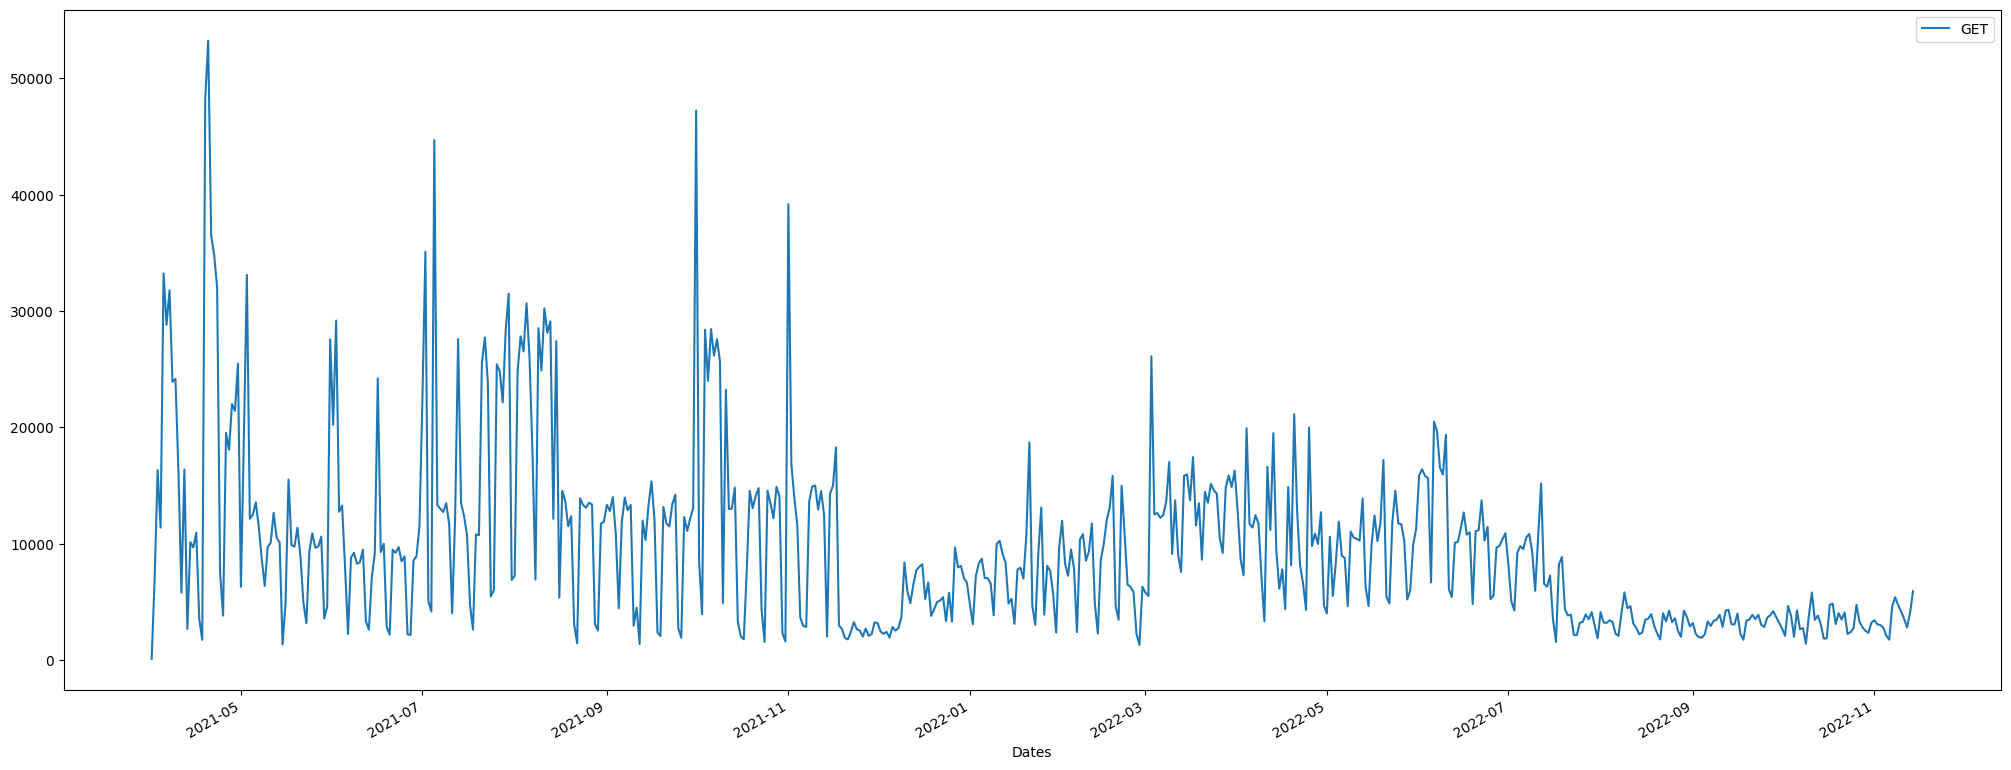

In [41]:
#data['Dates'] = datetime.strptime(data['Dates'], '%d/%b/%Y').strftime('%Y-%m-%d')
data['Dates'] = pd.to_datetime(data['Dates'], format="%d/%b/%Y")
data.plot(x="Dates", y=["GET"],figsize=(25, 10))
plt.show()